<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/EsercitaizoneMidterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
from sklearn.cluster  import KMeans
import scipy.optimize


pl.rcParams['font.size'] = 18

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ls

drive/  sample_data/


In [4]:
cd drive/MyDrive/MLPNS

/content/drive/MyDrive/MLPNS


In [5]:
datain = pd.read_excel('country_pop.xls')

In [6]:
datain.set_index("Data Source", inplace=True)
datain

,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Last Updated Date,2021-03-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,177755

In [7]:
datain.drop(labels=['World Development Indicators', 'Unnamed: 2', 'Unnamed: 3'], inplace=True, axis=1)
datain

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Last Updated Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN
"Yemen, Rep.",5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,6001852.0,6097035.0,6193384.0,6290365.0,6390574.0,6500816.0,6629999.0,6784695.0,6967941.0,7178675.0,7414158.0,7669694.0,79418

In [8]:
col_labes = datain.iloc[2].values
datain.columns = col_labes

In [9]:
datain.drop(labels=['Last Updated Date', 'Country Name'], inplace=True, axis=0)

In [10]:
datain.drop(datain.iloc[0], inplace=True, axis=0)

In [11]:
datain.head()

,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [12]:
datain.describe()

,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.620000e+02,2.620000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,0.0
mean,1.179711e+08,1.195572e+08,1.216769e+08,1.243147e+08,1.269732e+08,1.296974e+08,1.325655e+08,1.354229e+08,1.383333e+08,1.413881e+08,1.444867e+08,1.476651e+08,1.508048e+08,1.539241e+08,1.570535e+08,1.601227e+08,1.631434e+08,1.661540e+08,1.692168e+08,1.723536e+08,1.755287e+08,1.787889e+08,1.821832e+08,1.856176e+08,1.890493e+08,1.925482e+08,1.961520e+08,1.998510e+08,2.035907e+08,2.073257e+08,2.095272e+08,2.131956e+08,2.175867e+08,2.211680e+08,2.247178e+08,2.273953e+08,2.308789e+08,2.343545e+08,2.368914e+08,2.402735e+08,2.436306e+08,2.469731e+08,2.503131e+08,2.536651e+08,2.570378e+08,2.604338e+08,2.638541e+08,2.672945e+08,2.707831e+08,2.742927e+08,2.778084e+08,2.813103e+08,2.859592e+08,2.895972e+08,2.932690e+08,2.969551e+08,3.006718e+08,3.043855e+08,3.080349e+08,3.116413e+08,NaN
std,3.727671e+08,3.772341e+08,3.838050e+08,3.923722e+08,4.009823e+08,4.098290e+08,4.192404e+08,4.285823e+08,4.381393e+08,4.481881e+08,4.584336e+08,4.689386e+08,4.792615e+08,4.895014e+08,4.996954e+08,5.096061e+08,5.193115e+08,5.289139e+08,5.386684e+08,5.486594e+08,5.587651e+08,5.691714e+08,5.800984e+08,5.911665e+08,6.021906e+08,6.134308e+08,6.250233e+08,6.369460e+08,6.489776e+08,6.609301e+08,6.705729e+08,6.822141e+08,6.946935e+08,7.059082e+08,7.170350e+08,7.268532e+08,7.378025e+08,7.487287e+08,7.582218e+08,7.688007e+08,7.792332e+08,7.895540e+08,7.997943e+08,8.100079e+08,8.202349e+08,8.305062e+08,8.408031e+08,8.511121e+08,8.615320e+08,8.720240e+08,8.825330e+08,8.930727e+08,9.053117e+08,9.161345e+08,9.270351e+08,9.379621e+08,9.489723e+08,9.599831e+08,9.707328e+08,9.812747e+08,NaN
min,3.893000e+03,3.989000e+03,4.076000e+03,4.183000e+03,4.308000e+03,4.468000e+03,4.685000e+03,4.920000e+03,5.193000e+03,5.459000e+03,5.712000e+03,5.766000e+03,5.790000e+03,5.822000e+03,5.905000e+03,6.060000e+03,6.323000e+03,6.650000e+03,7.014000e+03,7.358000e+03,7.637000e+03,7.827000e+03,7.956000e+03,8.041000e+03,8.115000e+03,8.219000e+03,8.336000e+03,8.485000e+03,8.637000e+03,8.779000e+03,8.913000e+03,9.026000e+03,9.112000e+03,9.194000e+03,9.252000e+03,9.298000e+03,9.323000e+03,9.323000e+03,9.332000e+03,9.346000e+03,9.394000e+03,9.484000e+03,9.596000e+03,9.726000e+03,9.869000e+03,9.849000e+03,9.828000e+03,9.842000e+03,9.891000e+03,9.939000e+03,1.000500e+04,1.005700e+04,1.027900e+04,1.082100e+04,1.097200e+04,1.109900e+04,1.122500e+04,1.137000e+04,1.150800e+04,1.164600e+04,NaN
25%,5.022908e+05,5.109635e+05,5.206552e+05,5.311588e+05,5.421285e+05,5.533358e+05,5.647510e+05,5.823600e+05,5.981080e+05,6.100040e+05,6.241908e+05,6.399750e+05,6.573185e+05,6.762108e+05,6.966170e+05,7.184540e+05,7.309262e+05,7.556540e+05,7.716378e+05,7.758720e+05,7.812960e+05,7.907875e+05,8.031152e+05,8.186705e+05,8.397358e+05,8.608992e+05,8.819035e+05,9.030322e+05,9.244010e+05,9.462702e+05,9.961395e+05,1.015708e+

L'ultima colonna contiene molti NaN, e la eliminaimo 

In [13]:
datain.drop(labels=2020.0, axis=1, inplace=True)

In [14]:
datain.head()

,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [15]:
datain.isna().sum()

1960.0    4
1961.0    4
1962.0    4
1963.0    4
1964.0    4
1965.0    4
1966.0    4
1967.0    4
1968.0    4
1969.0    4
1970.0    4
1971.0    4
1972.0    4
1973.0    4
1974.0    4
1975.0    4
1976.0    4
1977.0    4
1978.0    4
1979.0    4
1980.0    4
1981.0    4
1982.0    4
1983.0    4
1984.0    4
1985.0    4
1986.0    4
1987.0    4
1988.0    4
1989.0    4
1990.0    2
1991.0    2
1992.0    3
1993.0    3
1994.0    3
1995.0    2
1996.0    2
1997.0    2
1998.0    1
1999.0    1
2000.0    1
2001.0    1
2002.0    1
2003.0    1
2004.0    1
2005.0    1
2006.0    1
2007.0    1
2008.0    1
2009.0    1
2010.0    1
2011.0    1
2012.0    2
2013.0    2
2014.0    2
2015.0    2
2016.0    2
2017.0    2
2018.0    2
2019.0    2
dtype: int64

In [16]:
dataClened = datain.dropna(axis=0, how='any')
dataClened

,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,20290

In [17]:
n_time = len(datain.columns)
n_country = len(datain)

In [18]:
n_time2 = len(dataClened.columns)
n_country2 = len(dataClened)

Observation lost is:

In [19]:
1 - (n_country2/n_country)

0.022727272727272707

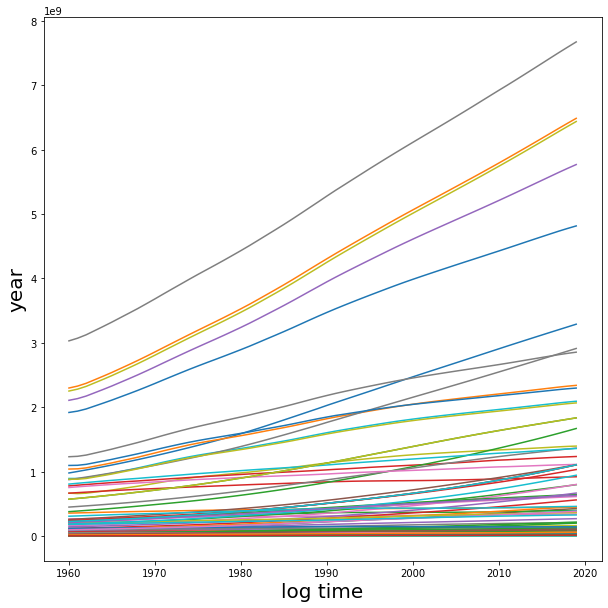

In [20]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)

for i in range(n_country):
  y = datain.iloc[i]
  pl.plot(datain.columns.values, y)

pl.ylabel("year", fontsize=20)
pl.xlabel("log time", fontsize=20);

**Figure 1:** Andamento della popolazione in funzione degli anni. È possibile notare come alcuni paesi abbiano avuto una crescita maggiore degli altri paesi.

Log scale

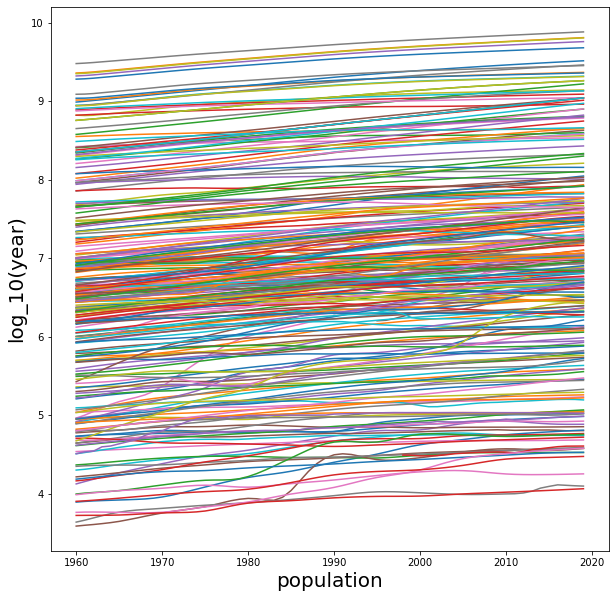

In [21]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)

for i in range(n_country):
  y = datain.iloc[i]
  pl.plot(datain.columns.values, np.log10(y))

pl.ylabel("log_10(year)", fontsize=20)
pl.xlabel("population", fontsize=20);

**Figure 2:** come prima ma in lo scale

Devo scalare i valori nazione per nazione, perciò in preprocessing.scale ci passo axis=1, ovvero "a riga fissata, scalo tutti i valori delle colonne". 

Se invece metto axis=0, a colonna fissata, sto scalando i valori delle righe.

In [22]:
data_scaled = preprocessing.scale(dataClened, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [23]:
data_scaled.shape

(258, 60)

In [24]:
data_scaled.mean(axis=1)

array([-9.43689571e-16,  3.84877315e-16, -2.22044605e-17, -6.46704912e-16,
       -4.58892184e-16, -6.95739762e-16, -4.66293670e-16, -1.19904087e-15,
       -1.62370117e-16, -5.32907052e-16,  7.69754630e-16, -1.11392377e-15,
        9.02981393e-16, -5.10702591e-16,  7.47550170e-16,  5.92118946e-17,
       -6.95739762e-16,  6.88338275e-16, -8.43769499e-16, -1.33226763e-16,
       -2.59052039e-16, -5.95819690e-16,  6.66133815e-17, -8.74300632e-17,
       -8.73375446e-16,  8.51170986e-16, -8.51170986e-16, -1.11022302e-15,
        1.48029737e-17,  5.32907052e-16, -2.62752782e-16, -1.07691633e-15,
        4.32986980e-16, -5.55111512e-16,  5.27355937e-17,  7.03141249e-16,
        1.55431223e-16, -6.92039019e-16,  8.69674703e-16, -5.44009282e-16,
       -5.18104078e-17,  6.14323407e-16,  5.99520433e-16, -3.29366164e-16,
       -3.40468394e-16, -8.80776933e-16,  6.77236045e-16, -7.91959091e-16,
        9.27036226e-16,  3.70074342e-17, -8.03061321e-16, -9.28886597e-16,
       -1.33226763e-16,  

In [25]:
data_scaled.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [26]:
dataClened.columns.values

array([1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
       1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
       1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
       2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019.])

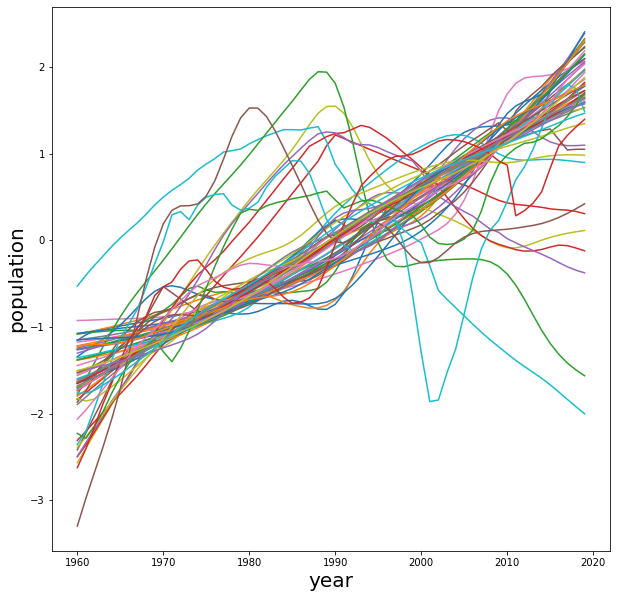

In [27]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)

for i in range(len(dataClened.columns)):
  pl.plot(dataClened.columns.values, data_scaled[i])

pl.ylabel("population", fontsize=20)
pl.xlabel("year", fontsize=20);

**Figure 3**: standardized data bla bal bla 

In [28]:
#x = dataClened.columns.values
x = np.arange(data_scaled.shape[1])
y = dataClened.iloc[i].values
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [29]:
from scipy.optimize import minimize

def polynom(a, b, c):
    return a * (x**2) + b * x + c
	
def l2(args, y):
    '''l2 target function: returns value of l2 for given arguments and data for a line model
    arg: (array) model arguments (parameters)
    x: the exogenous variable (array)
    y: the exogenous variable (array)
    returns L2 sum of difference between prediction and data squared
    '''
    a, b, c = args
    return sum((y - polynom(a, b, c))**2)


initialGuess = (1, 1, 0)
feature = []

for i in data_scaled:
  l2Solution = scipy.optimize.minimize(l2, initialGuess, args=(i))
  feature.append(l2Solution.x)
  #print(l2Solution.x)
  #print("")
  #print("best fit parameters from the minimization of L2: " + 
        #"intercept {:.2f}, slope {:.2f}".format(*l2Solution.x))

In [30]:
feature = np.array(feature)
feature.shape

(258, 3)

For each feature test if the sample is consistent with coming from a normal distribution (with NHRT test, e.g. we used the KS test in class for this purpose). Usiamo 2-sigma level.

In [31]:
import scipy as sp

In [32]:
sample1 = feature[:,0] #prendo la prima colonna, che raprpesenta il parametro a
sample2 = feature[:,1]
sample3 = feature[:,2]

In [33]:
sp.stats.kstest(sample1, "norm")

KstestResult(statistic=0.49858340827060543, pvalue=8.313480059916619e-60)

In [34]:
sp.stats.kstest(sample2, "norm")

KstestResult(statistic=0.47724886752036944, pvalue=1.5963432829475372e-54)

In [35]:
sp.stats.kstest(sample3, "norm")

KstestResult(statistic=0.789043643896516, pvalue=9.39527535479224e-172)

Per tutti e tre i campioni, rigettiamo la NH. Rigettiamo il fatto che i campioni provengono da una distribuzione normal, a 2-sigma.

In [36]:
dataClened.iloc[5].values.shape

(60,)

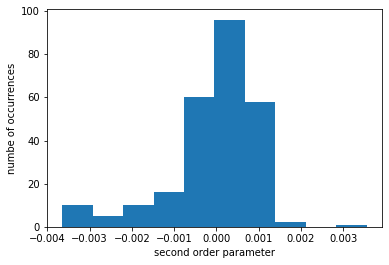

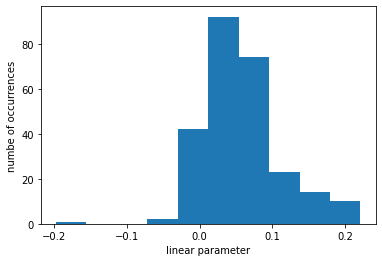

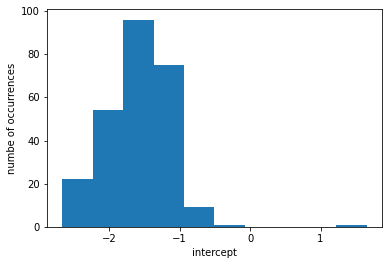

In [37]:
labels = ["second order parameter",
          "linear parameter",
          "intercept",
          "goodness of fit"]
for i in range(feature.shape[1]):
  pl.figure()
  pl.hist(feature[:,i])
  pl.xlabel(labels[i])
  pl.ylabel("numbe of occurrences")

In [38]:
feature_scaled = preprocessing.scale(feature, axis=0)

In [39]:
featsc_std = feature_scaled.std(axis=0)

In [40]:
featsc_mean = feature_scaled.mean(axis=0)
featsc_mean

array([ 6.66994453e-18, -5.32519765e-16, -1.70406325e-15])

i.c. variance with 1 clusters 774.000000
i.c. variance with 2 clusters 366.242988
i.c. variance with 3 clusters 212.569769
i.c. variance with 4 clusters 152.999839
i.c. variance with 5 clusters 112.684107
i.c. variance with 6 clusters 75.867691
i.c. variance with 7 clusters 59.161276
i.c. variance with 8 clusters 42.545334
i.c. variance with 9 clusters 35.686721


Text(0, 0.5, 'Variance')

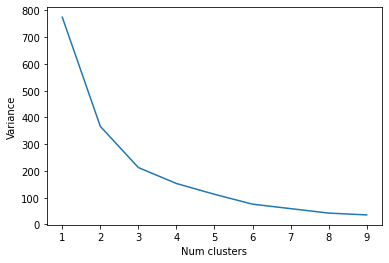

In [41]:
n_clus=10
nc=[]

for i in range(1, n_clus):
  c = KMeans(n_clusters=i, random_state=34).fit(feature_scaled)
  nc.append(c.inertia_)
  print("i.c. variance with {} clusters {:2f}".format(i, c.inertia_))
pl.plot(range(1, n_clus), nc)

pl.xlabel("Num clusters")
pl.ylabel("Variance")

Note: the cluster centers are datapoints in the feature space. If your feature space is 3D (3 coefficients, or four depending on what you choose in task 2.II) your cluster center is a tuple of numbers.

**However, the right way to show the cluster centers is to**

1- unscale the cluster centers by multiplying them by the stdev and adding back the mean

2- plot the polynomial generated by those cluster centers

3- plot the time series that belong to that cluster in the same plot.

Print how many time series are in each cluster.

To measure the intracluster compactness (to make the elbow plot that may help you decide how many clusters to plot use the attribute of the cluster model kmeas_fit_model.inertia_

To extract the cluster centers use kmeas_fit_model.cluster_centers_

To extract the cluster assignment for each time series use

kmeas_fit_model.labels_

In [42]:
featsc_mean[0]

6.6699445277867935e-18

##**CI VANNO I DATI RISCALATI NEL KMeans!!**

In [43]:
kmop = KMeans(n_clusters=4, random_state=302).fit(feature_scaled)

In [44]:
centers = kmop.cluster_centers_ 
centers

array([[ 0.73194825, -0.77964606,  0.73938986],
       [-2.11903439,  2.01001993, -1.28987078],
       [-0.17297782,  0.26043107, -0.43700738],
       [ 3.43133354, -4.67940099,  6.99317063]])

In [45]:
kmop.labels_

array([0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2,
       1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2], dtype=int32)

In [46]:
Nf = feature_scaled.shape[1]

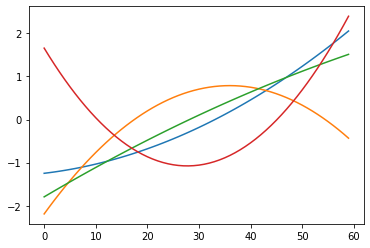

In [47]:
for i in range(4):
  a = polynom(*centers[i][:3] * feature.std(axis=0)[:3] + feature.mean(axis=0)[:3])
  pl.plot(a)

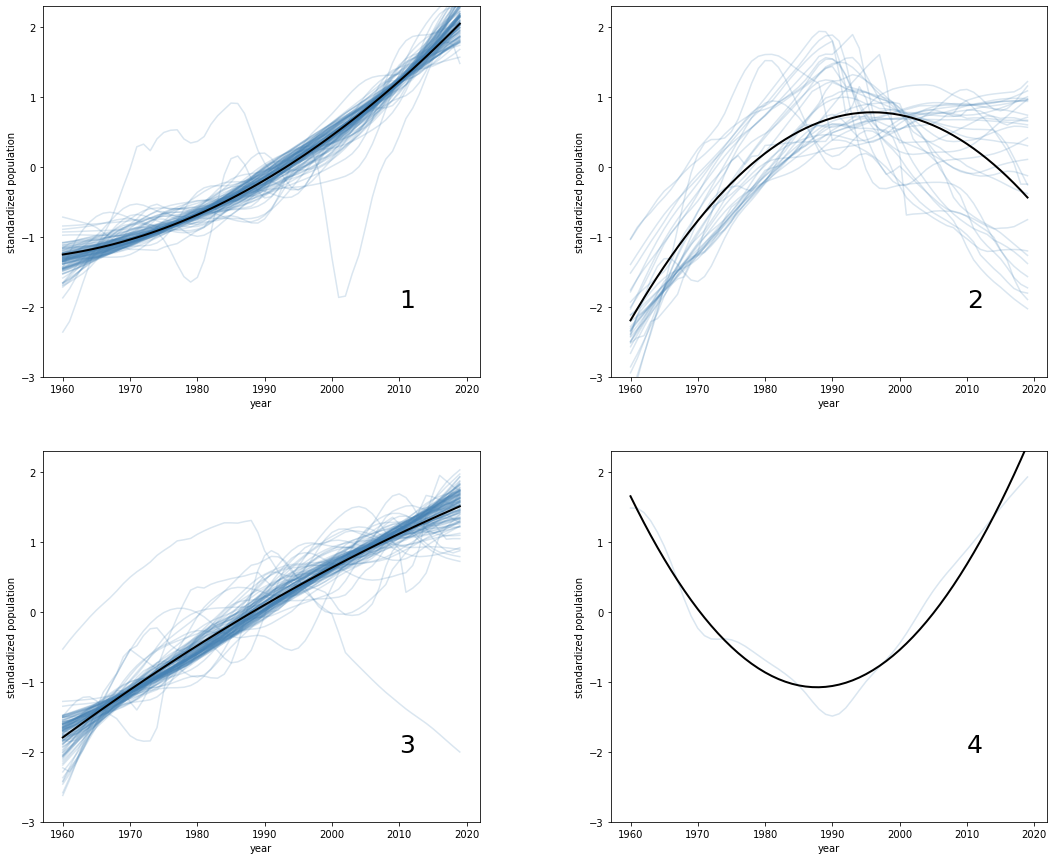

In [48]:
Nclusters = 4

c = KMeans(n_clusters=4, random_state=302).fit(feature_scaled[:,:Nf])

fig = pl.figure(figsize=(18,15))
ax = fig.subplots(nrows=int(Nclusters/2 + 0.5), ncols=2)
ax = ax.flatten()


for i in range(4):
  ax[i].plot(data_scaled[c.labels_==i].T, c='SteelBlue', alpha=0.2)
  ax[i].plot(polynom(*centers[i][:3] * 
                 feature.std(axis=0)[:3] + feature.mean(axis=0)[:3]), 
             'k', lw=2)  
  ax[i].set_xlabel("year")
  ax[i].set_xticks(ticks=range(0, 70, 10))
  ax[i].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)])
  ax[i].text(50, -2, i+1, fontsize=25)
  ax[i].set_ylim(-3, 2.3)

  ax[i].set_ylabel("standardized population");
pl.subplots_adjust(wspace=0.3)

In [49]:
for i in range(Nclusters):
  count=0
  for j in range(len(kmop.labels_)):
    if kmop.labels_[j] == i:
      count = count+1
  print("cluster {}, elementi{} ".format(i ,count))

cluster 0, elementi112 
cluster 1, elementi31 
cluster 2, elementi114 
cluster 3, elementi1 


In [50]:
#time series in cluster 

for i in range(Nclusters):
    clu = kmop.labels_[1==i].shape
    #print("cluster {%1d}", clu)

###Extract the name of the two smallest cluster

In [55]:
dataClened.index[c.labels_ == 1]

Index(['Albania', 'Armenia', 'Bosnia and Herzegovina', 'Belarus',
       'Central Europe and the Baltics', 'Cuba', 'Dominica', 'Estonia',
       'Faroe Islands', 'Georgia', 'Greenland', 'Guyana', 'Croatia', 'Hungary',
       'Japan', 'Lithuania', 'Latvia', 'Moldova', 'North Macedonia',
       'Montenegro', 'Poland', 'Puerto Rico', 'Romania', 'Russian Federation',
       'Slovak Republic', 'Slovenia', 'Tonga', 'Ukraine',
       'St. Vincent and the Grenadines', 'Virgin Islands (U.S.)', 'Kosovo'],
      dtype='object', name='Data Source')

In [56]:
dataClened.index[c.labels_ == 3]

Index(['St. Kitts and Nevis'], dtype='object', name='Data Source')